# Detect Heart Disease using patient data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [4]:
# Loading the dataset
df = pd.read_csv('dataset.csv')

In [6]:
# Data Exploration

print("\nDataset Head:\n", df.head())

print("\n\nData Info:")
print(df.info())

print("\n\nData Description:\n", df.describe())

print("\n\nMissing values per column:\n", df.isnull().sum())


Dataset Head:
    age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


Data Info:
<class 'pandas.core.frame.Da

In [7]:
# Separation of numeric and categorical features
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']

In [8]:
# Separate target and features
y = df['target']
X = df.drop('target', axis=1)

In [9]:
# Transformations for numeric features
numeric_transformer = StandardScaler()

# Transformations for categorical features
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [10]:
# Spliting of data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#applying a Random Forest classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Model training
model_pipeline.fit(X_train, y_train)

# Making predictions
y_pred = model_pipeline.predict(X_test)

In [13]:
# Evaluating the model's performance 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.54%


In [14]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       107
           1       0.95      0.95      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



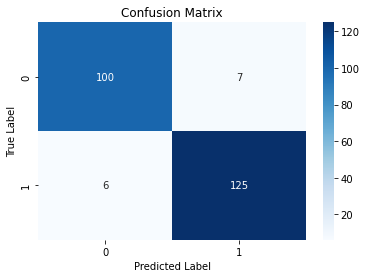

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
# Calculating ROC-AUC 
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.97


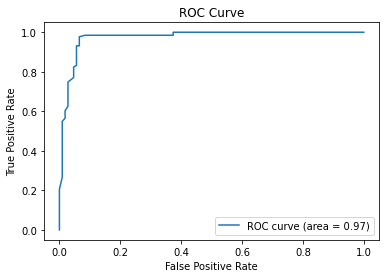

In [18]:
#Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

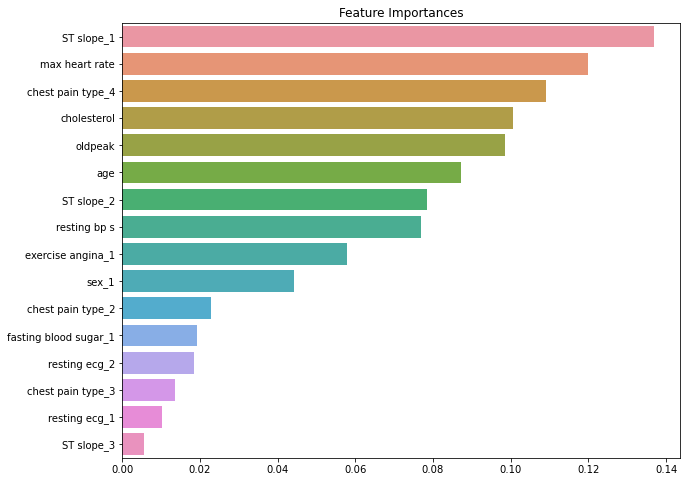

In [19]:
# Feature Importance 
feature_importances = model_pipeline.named_steps['classifier'].feature_importances_

feature_names = numeric_features + list(model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

feature_imp = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importances")
plt.show()
